
# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Projet H2022 : Quantité de phosphore suggérée

La description du projet est disponible à l'adresse suivante :
https://www.kaggle.com/t/7fafb91d4af0499f983d032feaadbdac

Ce calepin Jupyter permet d'effectuer les opérations de bases du projet :

1. Charger les données.
2. Effectuer une analyse exploratoire sommaire des données.
3. Développer un modèle simple de prédiction.
4. Générer le fichier de prédictions à téléverser sur Kaggle.

Dans un premier temps, vous devrez récupérer les données sous l'onglet *data* du site Kaggle. Il y a trois fichiers :
- train.csv
- test.csv
- benchmark_predictions.csv

Le fichier *train.csv* contient les données sur lesquelles vous pouvez entraîner votre modèle. Le fichier *test.csv* contient les variables explicatives sans les valeurs de la variable d'intérêt. Vous devrez prédire à l'aide de votre modèle entraîné les valeurs de la variable d'intérêt pour les valeurs des variables explicatives correspondantes de l'ensemble de test. Le fichier *benchmark_predictions.csv* est un exemple du format de fichier à téléverser sur Kaggle. Ce calepin permet de produire ce fichier. La qualité de vos prédictions sera ensuite évaluée lorsque vous les téléverserez sur Kaggle. Vos prédictions seront comparées à celles des autres équipes de la classe.

### Consignes

- Vous devez constituer une équipe de 3 à 5 personnes.
- Au moins une solution doit être proposée sur Kaggle.
- Utilisez votre identifiant d'équipe pour téléverser vos prédictions sur Kaggle.
- Un seul calepin .ipynb par équipe doit être remis. Ce fichier documente et illustre la procédure qui vous a permis de produire vos meilleures prédictions. Ce fichier constitue le rapport final diu projet.
- Le langage Julia doit être utilisé.
- Votre démarche doit être rigoureusement justifiée (consultez la grille de correction pour vous orienter).
- Seulement que les librairies qui sont importées dans la première cellule de code sont permises.

### Quelques conseils

Votre calepin doit permettre à une personne à l'extérieur de l'équipe de comprendre votre démarche et de reproduire vos résultats. Par exemple, une bonne façon de faire consiste à expliquer dans une cellule de texte la tâche qui est accomplie dans la cellule de code suivante. 

Je vous encourage fortement à faire une analyse exploratoire des données pour développer une meilleure expertise du problème. C'est une étape qui est toujours négligée mais qui est essentielle. C'est avec l'analyse exploratoire que vous viendra des idées d'amélioration, comme par exemple créer de nouvelles variables explicatives.

Vous pouvez utiliser directement tout ce qui se trouve dans les notes de cours sans explication et toutes les librairies utilisées dans le cours (incluant mes fonctions).

Ce calepin contient un modèle très simple de prédiction : on n'utilise qu'une seule variable explicative. Ce sera votre travail d'améliorer ces prédictions avec la méthode et les variables de votre choix.

S'il y a des données manquantes, ce sera à vous de traiter ce problème. La plupart du temps, une méthode simple d'imputation (de remplacement) des données manquantes est suffisante.

Prenez la peine de documenter succinctement les essais infructueux. Ce n'est pas nécessaire de les expliquer en détails, mais c'est important de les mentionner dans la discussion avec une raison possible de leur échec. De cette façon, une personne qui reprendra votre travail dans le futur ne perdra pas de temps à réessayer une méthode infructueuse déjà testée.

Vous pouvez aussi indiquer dans votre rapport les raisons qui vous font croire pourquoi une méthode a moins bien performée de ce qui était attendu. Vous pouvez également mentionner ce que vous auriez pu tenter si vous aviez eu plus de temps ou plus de données. L'idée est de guider l'analyste qui prendrait la relève de votre travail.

Vous êtes limités à deux soumissions par jour UTC par équipe sur Kaggle. Je vous suggère donc de bien tester vos modèles localement et de ne téléverser que vos meilleurs prédictions de la journée.

In [1]:
import Pkg; Pkg.add("Missings")
import Pkg; Pkg.add("StatsBase");
import Pkg; Pkg.add("Combinatorics");
import Pkg; Pkg.add("Random");
import Pkg; Pkg.add("LinearAlgebra");
import Pkg; Pkg.add("GLM");
import Pkg; Pkg.add("Optim");
using Gadfly

    Updating registry at `C:\Users\Ayoub\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes t

In [2]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Ayoub\.julia\environments\v1.7\Manifest.toml`


In [3]:
# Librairies pouvant être utilisées

using CSV, DataFrames, Missings
using Distributions, MLBase, StatsBase, Statistics
using Combinatorics, Random
using LinearAlgebra, GLM, Optim

using Gadfly

import Plots

## 1. Chargement des données

Assurez vous d'avoir téléchargé les données dans le répertoire de ce calepin.

In [4]:
data = CSV.read("train.csv", DataFrame)
first(data,5)

,id,crop,temperature,humidity,rainfall,ph,N,K,P
,Int64,String15,Float64,Float64,Float64,Float64,Int64,Int64,Int64
1,1,rice,20.8797,82.0027,202.936,6.50299,90,43,42
2,2,rice,21.7705,80.3196,226.656,7.0381,85,41,58
3,3,rice,23.0045,82.3208,263.964,7.84021,60,44,55
4,4,rice,23.058,83.3701,251.055,7.07345,69,42,37
5,5,rice,22.7088,82.6394,271.325,5.70081,69,38,55


## 2. Analyse exploratoire

C'est une analyse exploratoire sommaire. Je vous encourage fortement à poursuivre cette analyse.

#### 2.1 Quantité de phosphore moyenne requise en fonction des cultures

In [5]:
# Calcul de la moyenne par culture

combine(groupby(data, :crop), :P => mean)

,crop,P_mean
,String15,Float64
1,rice,49.0274
2,maize,48.3165
3,chickpea,67.8767
4,lentil,67.8533


In [6]:
# Les différentes cultures semblent avoir des besoins différents en phosphore.

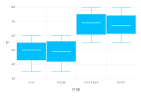

In [7]:
# Affichage de phosphore requises pour les différentes cultures

df = select(data, :P, :crop)

plot(df, x=:crop, y=:P, Geom.boxplot)
#tracer deux lois normales

#### 2.2 Quantité de phosphore requise en fonction du ph du sol

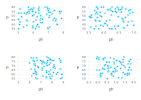

In [25]:
riz = filter(row -> row.crop == "rice", data)
mais = filter(row -> row.crop == "maize", data)
chickpea = filter(row -> row.crop == "chickpea", data)
lentil = filter(row -> row.crop == "lentil", data)


plot1 = plot(riz, x=:ph, y=:P, Geom.point)
plot2 = plot(mais, x=:ph, y=:P, Geom.point)
plot3 = plot(chickpea, x=:ph, y=:P, Geom.point)
plot4 = plot(lentil, x=:ph, y=:P, Geom.point)
gridstack([plot1 plot2; plot3 plot4])

In [9]:
# Le ph du sol semble influencer la quantité de phosphore requise.

## 3. Ajustement d'un modèle de régression linéaire

Pour cet exemple simple, on n'utilise que le type de culture comme variable explicative. La librairie GLM est utilisée pour modéliser la quantité de phosophore (P) recommandée pour la cuture (crop).

In [10]:
M = lm(@formula(P ~ crop), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

P ~ 1 + crop

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)    67.8767      0.890224   76.25    <1e-99   66.1247    69.6287
crop: lentil   -0.023379    1.25055    -0.02    0.9851   -2.48447    2.43771
crop: maize   -19.5603      1.23483   -15.84    <1e-40  -21.9904   -17.1301
crop: rice    -18.8493      1.25897   -14.97    <1e-37  -21.327    -16.3717
────────────────────────────────────────────────────────────────────────────

## 4. Estimation de la quantité de phosphore requise pour l'ensemble de test

On utilise le modèle simple de la section précédente pour estimer la quantité de phosphore requise pour chacune des lignes de l'ensemble de test.

#### 4.1 Chargement des données de l'ensemble de test

In [11]:
test = CSV.read("test.csv", DataFrame);

#### 4.2 Estimation de la quantié de phosphore pour chacune des ligne de l'ensemble de test.

In [12]:
ŷ = predict(M, test)

100-element Vector{Union{Missing, Float64}}:
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
 49.02739726027397
  ⋮
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332
 67.85333333333332

#### 4.3 Préparation du fichier des préditions pour téléverser sur Kaggle

Le fichier *benchmark_predictions.csv* généré peut être téléversé sur Kaggle. Il est composé d'une colonne d'identifiants (ID) et d'une colonne des quantités de phosphore requises.

In [13]:
prediction = DataFrame(id = test.id, Prediction = ŷ)

CSV.write("benchmark_predictions.csv", prediction)

"benchmark_predictions.csv"